# EDS232 Lab 1: Regression

## Overview
In this lab, we will introduce the basics of machine learning in **Python** with **regression** algorithms, a core technique used to predict continuous outcomes. We will use the popular **scikit-learn** library, which provides easy-to-use tools for building and evaluating machine learning models.

Specifically, we will learn how regression algorithms can help us model and predict water quality data.

## Objectives
By the end of this lab, you will be able to:
- Understand the concept of regression 
- Implement regression models in Python
- Evaluate model performance using  **R²** and **MSE**
- Visualize regression prediction results 

## Key Concepts

- **Regression**: A machine learning method for predicting continuous values.
  - **Simple Linear Regression**: A regression model with one independent variable.
  - **Polynomial Regression**: A regression model which models the relationship between X and Y as an n-degree polynomial.
  
- **Scikit-learn**: A Python library that provides simple and efficient tools for data mining and machine learning. We will use it for:
  - **Data Preprocessing**: Preparing data for the model.
  - **Model Training**: Fitting the regression model to our data.
  - **Model Evaluation**: Assessing model performance using model evaluation metrics.

- **Model Evaluation Metrics**: Tools to assess how well our model fits the data, such as:
  - **R² (R-squared)**: Measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).
  - **MSE (Mean Square Error)**: The average squared differences between predicted and actual values.



### About the data

Hurricane Irene caused extensive flood and wind damage as it traveled across the Caribbean and up the East coast of the United States.  The Hurricane made landfall in the United States near Cape Lookout, North Carolina on August 27th, 2011 and was downgraded to a Tropical Storm by the time it hit the New York City region on Sunday, August 28th, 2011.

A dataset from the Hudson River Environmental Conditions Observing System (HRECOS) offers a detailed look at the effects of Hurricane Irene on the river's ecosystem through high-frequency, 15-minute interval measurements over a ten-day period. It includes variables critical to understanding ecological health, such as water temperature, dissolved oxygen, turbidity, depth, and meteorological data like rainfall and wind speed. Analyzing these variables helps answer questions about how extreme weather events like hurricanes can disrupt river ecosystems and impact water quality.
**You can access the data and metadata [here](https://www.caryinstitute.org/eco-inquiry/hudson-data-jam-competition/datasets/hurricane-irene-and-hudson-river).**

### Step 1: Import libraries and load data


#### Load libraries

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)

#### Load the data

Turbidity levels in water can be significantly affected by major weather events such as hurricanes. Turbidity measures how much light is blocked by particles in water. In an event like a hurricane, we expect wind and rainfall to bring in suspended particles, increasing the turbidity of the water. When light is blocked by particles in water, oxygen production is impacted as well. When a natural disaster like a hurricane alters turbidity levels in a body of water, how is dissolved oxygen  impacted? Let's find out. 

In this lab, we are interested in the turbidity and dissolved oxygen variables. Read the data into the `hurricane_do` and `hurricane_turbidity` variables. Then, merge these two dataframes. Store the result in the `df` variable. Drop the columns that contain data for Piermont, as Piermont does not contain any turbidity data. We are only interested in the Port of Albany and Norrie Point for this lab. 

*Notice that the data is not a csv file and is instead a **.xlsx** file! Use the `pandas.read_excel` function to read in your data. You can find more documentation on reading in .xlsx files [here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).*

In [19]:
hurricane_do = pd.read_excel('Hurricane_Irene_and_the_Hudson_River_do-Copy1.xlsx', sheet_name=5)

hurricane_turbidity = pd.read_excel('Hurricane_Irene_and_the_Hudson_River_do-Copy1.xlsx', sheet_name=2)
df = pd.merge(hurricane_do, hurricane_turbidity)

In [20]:
# Drop Piedmont columns
df = df.drop(['Piermont D.O. (ppm)', 'Piermont Turbidity in NTU'], axis = 1)

### Step 2: Explore  and clean the data

Do some initial exploratory analysis on the data. Check out what type of data you are working with, and plot your data. Write a few sentences on your findings. 

In [21]:
# View the first five rows of data
print(df.head())

       Date Time (ET)   Port of Albany D.O. (ppm)  Norrie Point D.O. (ppm)  \
0 2011-08-25 00:00:00                        7.68                     7.81   
1 2011-08-25 00:15:00                        7.60                     7.73   
2 2011-08-25 00:30:00                        7.57                     7.63   
3 2011-08-25 00:45:00                        7.72                     7.67   
4 2011-08-25 01:00:00                        7.74                     7.63   

    Port of Albany Turbidity in NTU  Norrie Point Turbidity in NTU  
0                               4.0                            9.3  
1                               3.9                            8.4  
2                               4.3                            7.9  
3                               4.7                            8.1  
4                               4.4                            8.4  


In [22]:
# View the df column names
print(df.columns)

Index(['Date Time (ET)', ' Port of Albany D.O. (ppm)',
       'Norrie Point D.O. (ppm)', ' Port of Albany Turbidity in NTU',
       'Norrie Point Turbidity in NTU'],
      dtype='object')


In [23]:
# View the data types of the columns
print(df.dtypes)

Date Time (ET)                      datetime64[ns]
 Port of Albany D.O. (ppm)                 float64
Norrie Point D.O. (ppm)                    float64
 Port of Albany Turbidity in NTU           float64
Norrie Point Turbidity in NTU              float64
dtype: object


In [24]:
# View the class of the dataframe
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Axes(0.125,0.11;0.775x0.77)


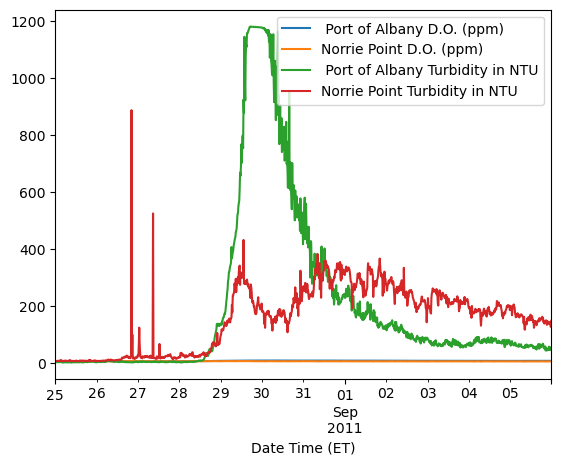

In [25]:
# Visualize the data using Date Time as the x-axis
print(df.plot(x = 'Date Time (ET)'))

#### Preliminary Data Exploration Summary
By exploring the data, I can see that this data frame contains information about dissolved oxygen and turbitity in the ports of Albany and Norrie. I can also see that the data contains a date-time column as well. After looking at the column names, I can tell that they are not clean, and will need to be cleaned later. I used the `.plot()` function to visualize the data based on date time. From this visualization, I can see that there are spikes of turbidity in both ports.

When you were exploring the data, you may have noticed that the column names aren't the cleanest. Update the column names to the following : `date`, `albany_DO`, `norrie_DO`, `albany_turbidity`, `norrie_turbidity` (**make sure your column names are in that order!!**). 

In [26]:
# Change the column names
df.columns = (['date', 'albany_DO', 'norrie_DO', 'albany_turbidity', 'norrie_turbidity'])

# View the df column names
df.columns

Index(['date', 'albany_DO', 'norrie_DO', 'albany_turbidity',
       'norrie_turbidity'],
      dtype='object')

### Step 3: Prepare the data for machine learning

It is time to split our data into training and testing data for our linear regression model. The `train_test_split` function from the `sklearn.model_selection` module will let us accomplish this.

The `train_test_split` function takes two inputs: X and Y, and produces four outputs: X_train, X_test, Y_train, and Y_test.  It also takes two parameters, `test_size`, which specifies the proportion of data to be used in the testing set and `random_state`.

This process allows us to train the model on a subset of the data (training set) and then evaluate its performance and generalizability on unseen data (testing set). By doing this, we can assess how well the model predicts dissolved oxygen levels based on turbidity after a storm. 

Select your data such that `albany_turbidity` is your feature or independent variable (X) and `albany_DO` is your target or dependent variable (Y). Then split it using `train_test_split`.

 **Use a test size of 0.33 and a random state of 42**. 

In [46]:
# Select features and target
X = df[['albany_turbidity']]
Y = df[['albany_DO']]

# Use train_test_split to split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

### Step 4: Select your model

We are going to use linear regression to predict the turbidity in Albany. Is linear regression a good model to pick to achieve this goal? Answer in the markdown cell below.

A linear regression is a good way to start on this data set for a couple reasons:
1. both variables are continous 
2. High turbity waters impact disolved oxygen because as the water gets cloudy, aquatic plants are able to produce less oxygen which leads to less oxygen in the water

It is helpful to note, while turbidity impacts D.O., D.O. does not tend to greatly impact turbidity. This means later I may need to try a different model. 

In [54]:
# Initialize and fit the model
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, Y_train)

# Print the model score
print(model.score(X_train, Y_train))

0.4818344583053916


### Step 5: Evaluate the model

Now it's time to see how well our model does on this task.  To accomplish this, make predictions with your model on the test data and then check its performance by examining the MSE and the $R^2$ score. Because we held the test data out from the training process, these predictions give us an idea of how our model performs on unseen data. Then visualize your model's performance by creating a scatter plot of the Y predictions and your Y test data. 

Mean Squared Error: 0.28305576669365956
R² Score: 0.48988874519870107


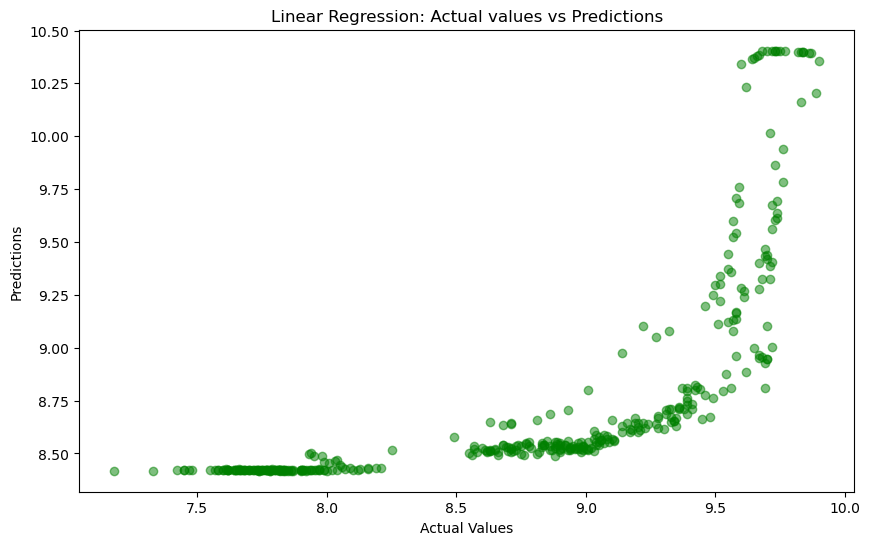

In [55]:
# Make predictions
Y_pred = model.predict(X_test)

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
mse =  mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the outcomes
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize predictions vs. actual valuess
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Actual values vs Predictions')
plt.show()

### Step 6:  Present the Solution
In the markdown cell below, discuss how your model performed overall. If the model performed poorly, why do you think it did so? If it performed well, why do you think it did so? What could future analysis include? 

# Needs work
The Mean Squared Error is reletively close to 0 (0.283) which is a good sign. However, the R² is 0.4899. Ideally, the R² would be closer to 1 than 0, but mine is right in the middle and mildly closer to 0. This makes me question the model. Additionally, when I look at the plot I can see that the data points follow a certain shape, but it is not a straight line. This has lead me to doubt if this model is performing well. It may be beneficial in the future to use a polynomial regression. 

#### *Before we selected our algorithm, we should have looked at the data for evidence of a linear relationship between variables. Let's check now!*

<Figure size 1000x600 with 0 Axes>

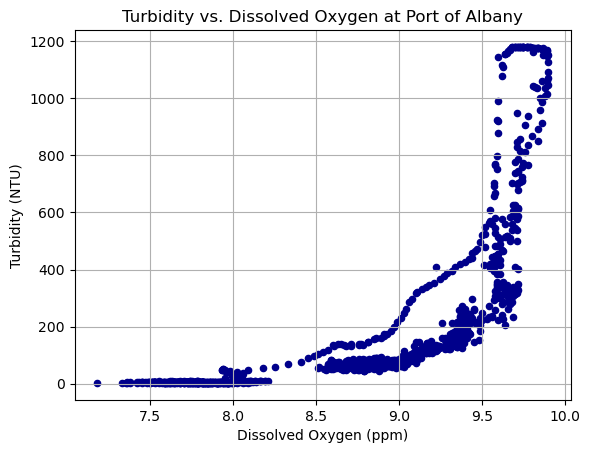

In [30]:
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
df.plot.scatter(x='albany_DO', y='albany_turbidity', c='DarkBlue')

plt.title('Turbidity vs. Dissolved Oxygen at Port of Albany')
plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Turbidity (NTU)')
plt.grid(True)
plt.show()

### Step 7: Check to see if polynomial regression performs better

We assumed linear regression would work well with our data, but this data doesn't look very linear. It's a good reminder of the importance of exploratory analysis. Let's check to see how a polynomial regression performs in comparison. Transform the features for polynomial regression. Use the `PolynomialFeatures` class from the `sklearn.preprocessing` module. 

In [51]:
# Transform features to include polynomial terms (degree 2 for quadratic terms)
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# View the transformed feature set (for insight)
print(X_poly_train)
print(X_poly_test)

[[1.00000e+00 5.00000e+00 2.50000e+01]
 [1.00000e+00 7.51000e+01 5.64001e+03]
 [1.00000e+00 7.39000e+02 5.46121e+05]
 ...
 [1.00000e+00 6.29000e+01 3.95641e+03]
 [1.00000e+00 8.18000e+01 6.69124e+03]
 [1.00000e+00 5.53000e+01 3.05809e+03]]
[[1.0000000e+00 3.8000000e+00 1.4440000e+01]
 [1.0000000e+00 1.4270000e+02 2.0363290e+04]
 [1.0000000e+00 4.4870000e+02 2.0133169e+05]
 ...
 [1.0000000e+00 3.7910000e+02 1.4371681e+05]
 [1.0000000e+00 6.1900000e+01 3.8316100e+03]
 [1.0000000e+00 5.6200000e+01 3.1584400e+03]]


### Step 8: Fit your model on the polynomial features

In [52]:
# Train the model on polynomial features 
poly_model = LinearRegression()

# Fit the model 
model.fit(X_poly_train, Y_train)

LinearRegression()

### STEP 9: Evaluate the polynomial regression model 
- Make predictions with your model and then check the performance of the model.
- Check your model performance by looking at the MSE and the $R^2$ score.
- Create a scatter plot of the Y polynomial predictions and your Y test data.

0.15020422895772173
Polynomial Regression Mean Squared Error: 0.15020422895772173
Polynomial Regression R² Score: 0.7293082257073078


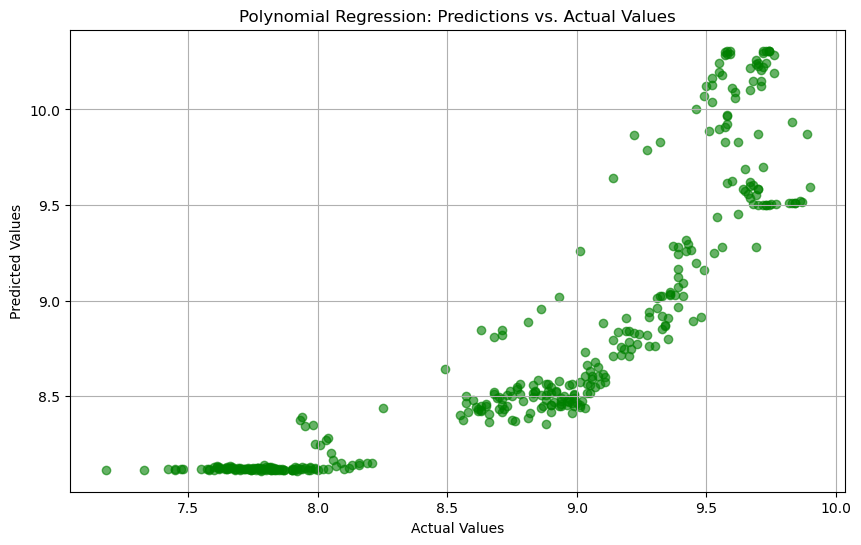

In [33]:
# Make predictions using the polynomial model
Y_poly_pred = model.predict(X_poly_test)
#print(Y_poly_pred)

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
poly_mse = mean_squared_error(Y_test, Y_poly_pred)
print(poly_mse)
poly_r2 = r2_score(Y_test, Y_poly_pred)

print(f"Polynomial Regression Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression R² Score: {poly_r2}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_poly_pred, alpha=0.5, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Predictions vs. Actual Values')
plt.show()

### Step 10: Compare your polynomial and linear regression results

What differences did you notice between you polynomial regression and linear regression results? Which model performed better? Why do you think this is? Write your answer in the markdown cell below. 

The mean squared error in the polynomial regression (0.150) is much lower than the MSE in the linear model (0.283). This would imply that the data points have less squared error in the polynomial regression, which is want I want. Additionally, the Polynomial Regression R² Score (0.729) is much higher than the linnear model (0.4899). Both of these scores imply the polynomial regression is a better fit. Even without the numbers and just looking at the plot, this makes sense because of how the data looks.